# Feature Engineering with Image Data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import glob

from PIL import Image
import cv2
import os

dp = os.environ.get('pub_data')


data = dp + 'JatRacer_Images/direction/'
img_paths = glob.glob(data + "*.jpg")

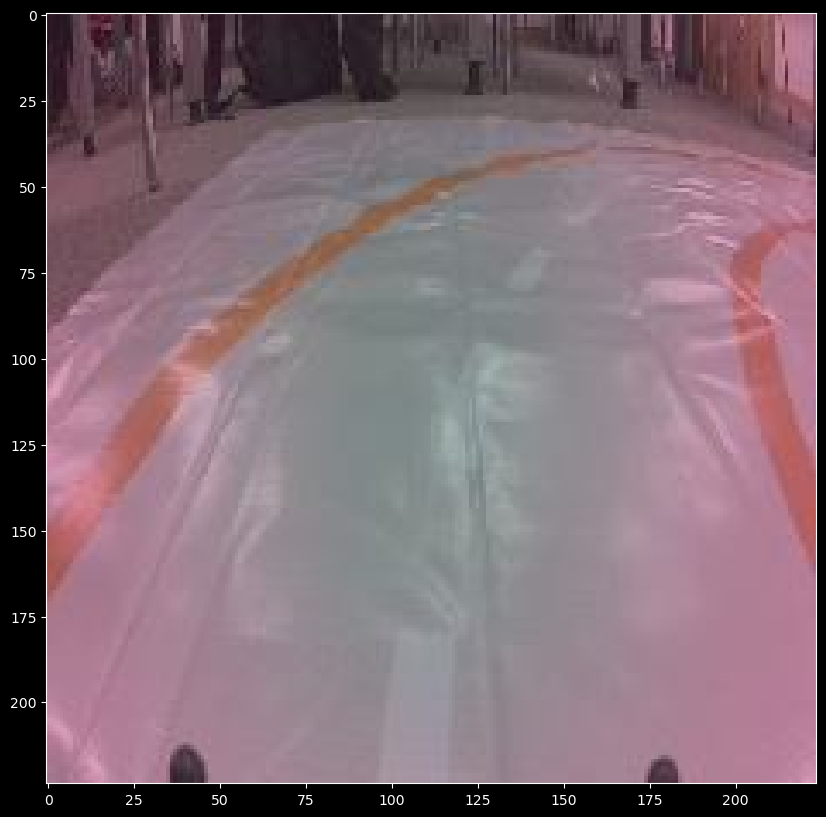

In [23]:
fig = plt.figure(figsize=(10, 10))

# show img
img = Image.open(img_paths[0])
plt.imshow(img)

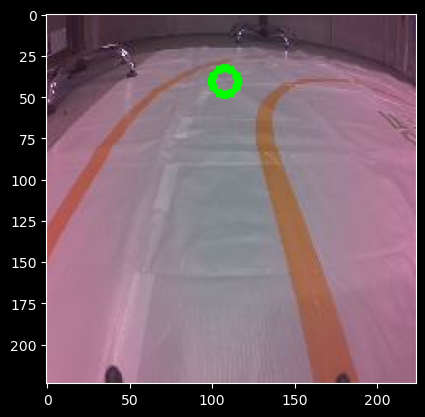

In [2]:
# Load example image
name = "108_41_ddf3fd7a-4eff-11ed-9b15-f602a686e36d.jpg"
x = int(name.split('_')[0])
y = int(name.split('_')[1])

img = Image.open(data + name)
img = img.copy()

img = np.array(img)

cv2.circle(img, (x, y), 8, (0, 255, 0), 3)
plt.imshow(img)

## Croping 


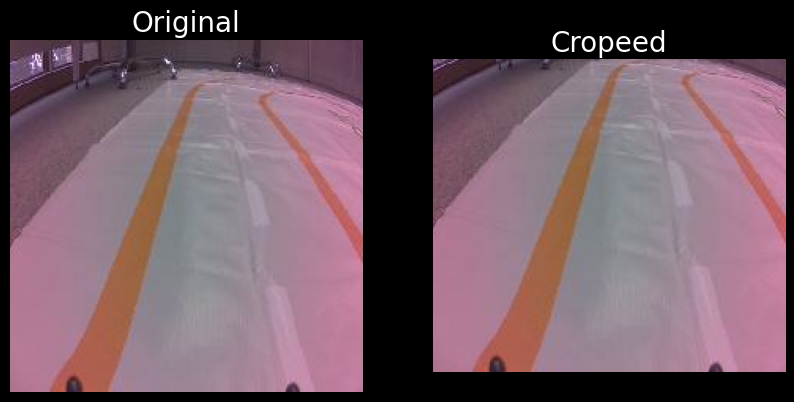

In [6]:
# Load image
img = Image.open(img_paths[609])

# Covert to array
img = np.array(img)

# Simple crop
crop_img = img[25:, ]

# Display images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:black')

ax[0].imshow(img)
ax[0].set_title('Original', size=20)

ax[1].imshow(crop_img)
ax[1].set_title('Cropeed', size=20)

for a in ax:
    a.axis('off')


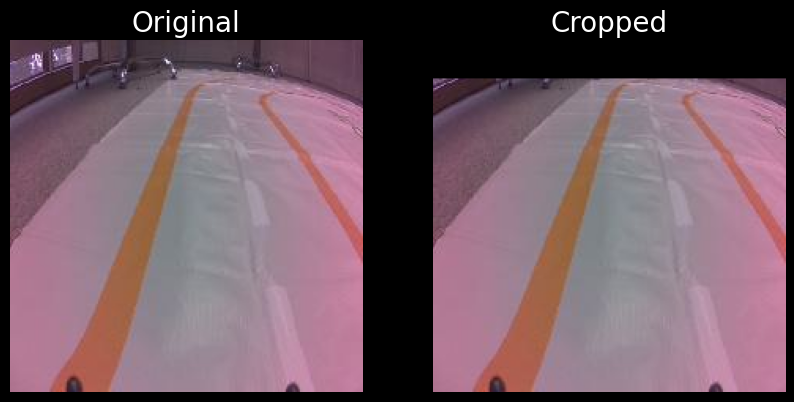

In [7]:
img = Image.open(img_paths[609])
img = np.array(img)

# Change pixels to black
crop_img = np.array(img)
crop_img[:25,] = [0, 0, 0]

# Display images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:black')

ax[0].imshow(img)
ax[0].set_title('Original', size=20)

ax[1].imshow(crop_img)
ax[1].set_title('Cropped', size=20)

for a in ax:
    a.axis('off')

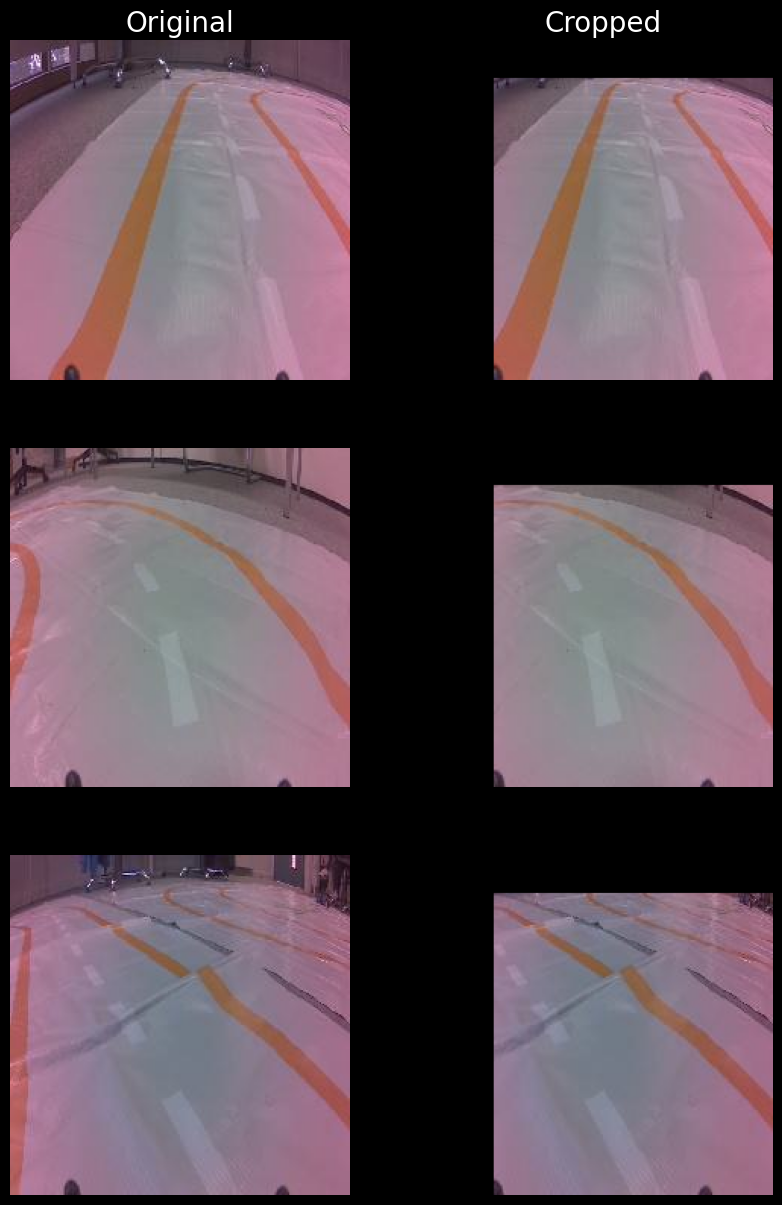

In [9]:
# Example of bad cropping
img = Image.open(img_paths[609])
crop_img = np.array(img)
crop_img[:25,] = [0, 0, 0]
crop_img[:, :40] = [0, 0, 0]

img2 = Image.open(img_paths[5])
crop_img2 = np.array(img2)
crop_img2[:25,] = [0, 0, 0]
crop_img2[:, :40] = [0, 0, 0]

img3 = Image.open(img_paths[1585])
crop_img3 = np.array(img3)
crop_img3[:25,] = [0, 0, 0]
crop_img3[:, :40] = [0, 0, 0]

# Display images
fig,ax = plt.subplots(3, 2, figsize=(10, 15))
fig.patch.set_facecolor('xkcd:black')

ax[0,0].imshow(img)
ax[0,0].set_title('Original', size=20)

ax[0,1].imshow(crop_img)
ax[0,1].set_title('Cropped', size=20)

ax[1,0].imshow(img2)
ax[1,1].imshow(crop_img2)

ax[2,0].imshow(img3)
ax[2,1].imshow(crop_img3)

for a1 in ax:
    for a2 in a1:
        a2.axis('off')
        a2.axis('tight')
        a2.axis('image')



## Gray Scale

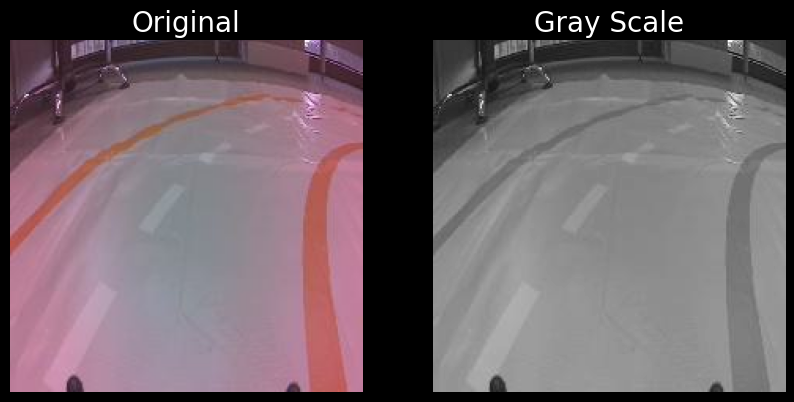

In [10]:
# Load image
img = Image.open(img_paths[700])
img = np.array(img)

# Gray scale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Display
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:black')

ax[0].imshow(img)
ax[0].set_title('Original', size=20)

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('Gray Scale', size=20)

for a in ax:
    a.axis('off')

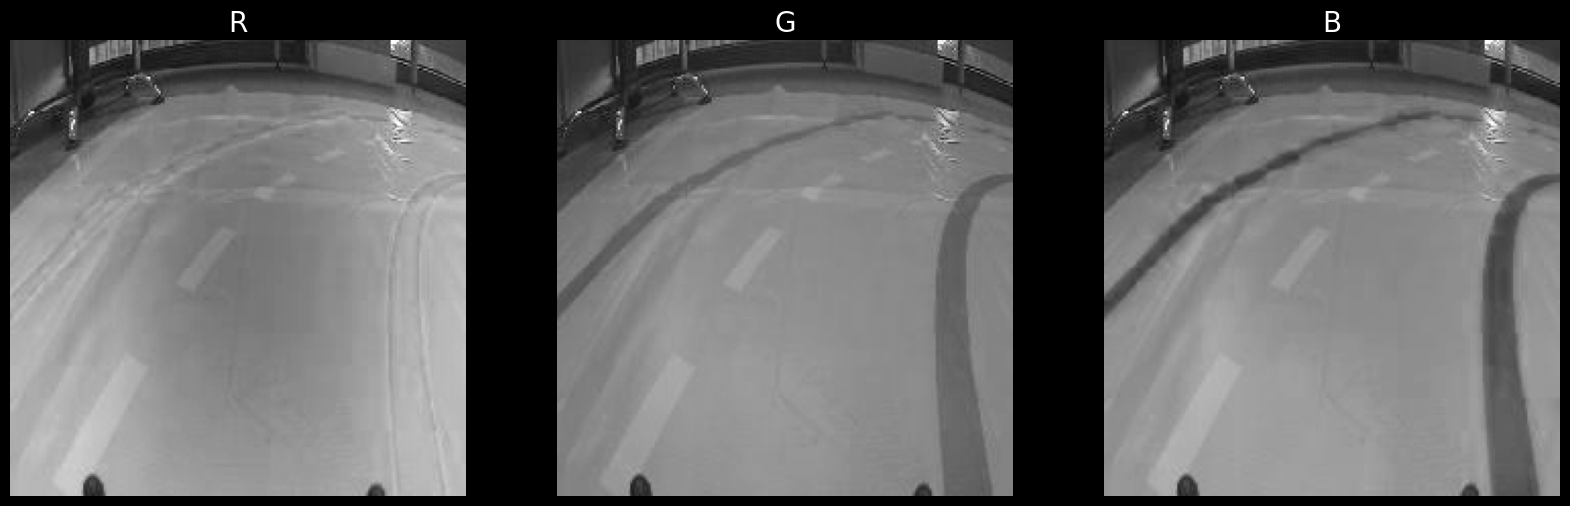

In [11]:
img = Image.open(img_paths[700])
img = np.array(img)

r_img = img[:, :, 0]
g_img = img[:, :, 1]
b_img = img[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.patch.set_facecolor('xkcd:black')

ax[0].imshow(r_img, cmap='gray')
ax[0].set_title('R', size=20)

ax[1].imshow(g_img, cmap='gray')
ax[1].set_title('G', size=20)

ax[2].imshow(b_img, cmap='gray')
ax[2].set_title('B', size=20)

for a in ax:
    a.axis('off')

In [12]:
def channel_filter(img, c=0):
    '''
    Returns given channel from image pixels
    '''
    img = np.array(img)
    c_img = img[:, :, c]
    return c_img

## Intensity threshold

In [13]:
def threshold(img, cutoff=80):
    '''
    Apply intesity thresholding
    '''

    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply cutoff
    img[img>cutoff] = 1000 # Block
    img[img<=cutoff] = 0 # white

    return img/1000

In [24]:
import os

dp = os.environ.get('pub_data')
data = dp + 'JatRacer_Images/object_detection/'
img_paths = glob.glob(data + '*.jpg')

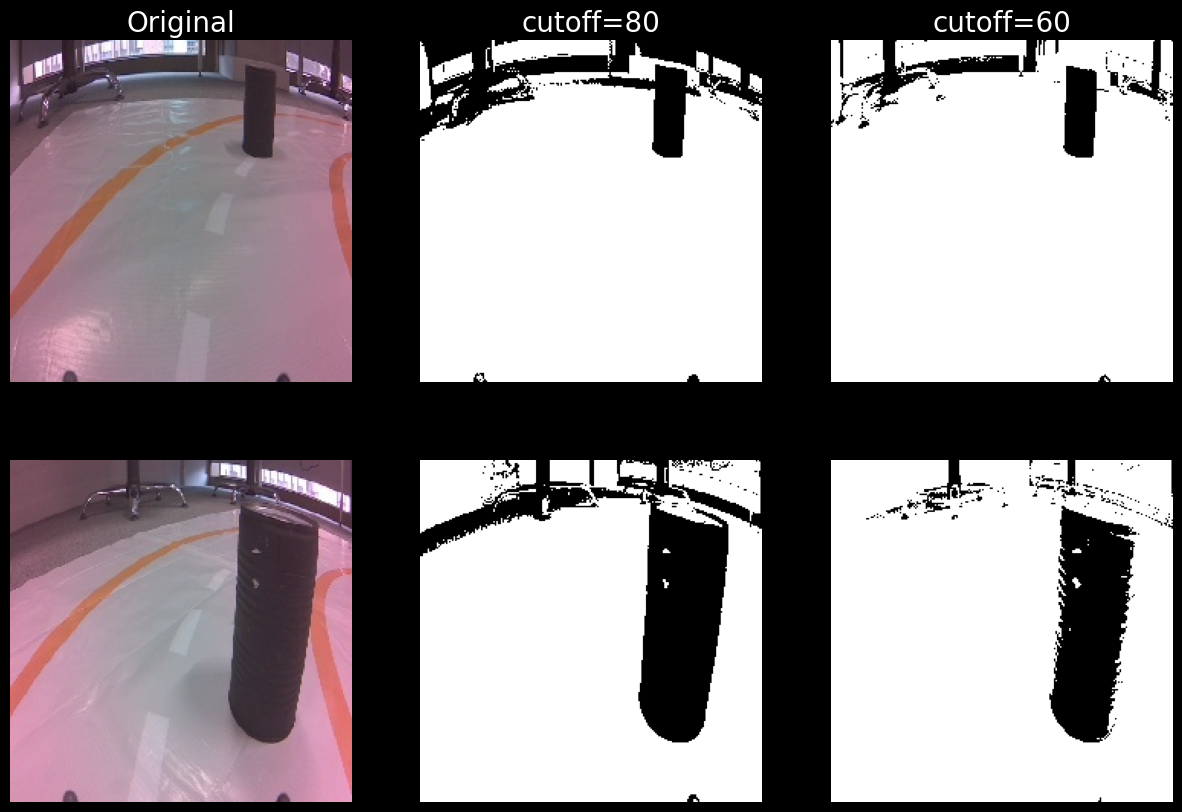

In [25]:
img1 = Image.open(img_paths[681])
img2 = Image.open(img_paths[69])

# Display images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.patch.set_facecolor('xkcd:black')

ax[0, 0].imshow(img1)
ax[0, 0].set_title('Original', size=20)

ax[0, 1].imshow(threshold(img1, 80), cmap='gray')
ax[0, 1].set_title('cutoff=80', size=20)

ax[0, 2].imshow(threshold(img1, 60), cmap='gray')
ax[0, 2].set_title('cutoff=60', size=20)

ax[1, 0].imshow(img2)
ax[1, 1].imshow(threshold(img2, 80), cmap='gray')
ax[1, 2].imshow(threshold(img2, 60), cmap='gray')

for a1 in ax:
    for a2 in a1:
        a2.axis('off')

## Edge detection 

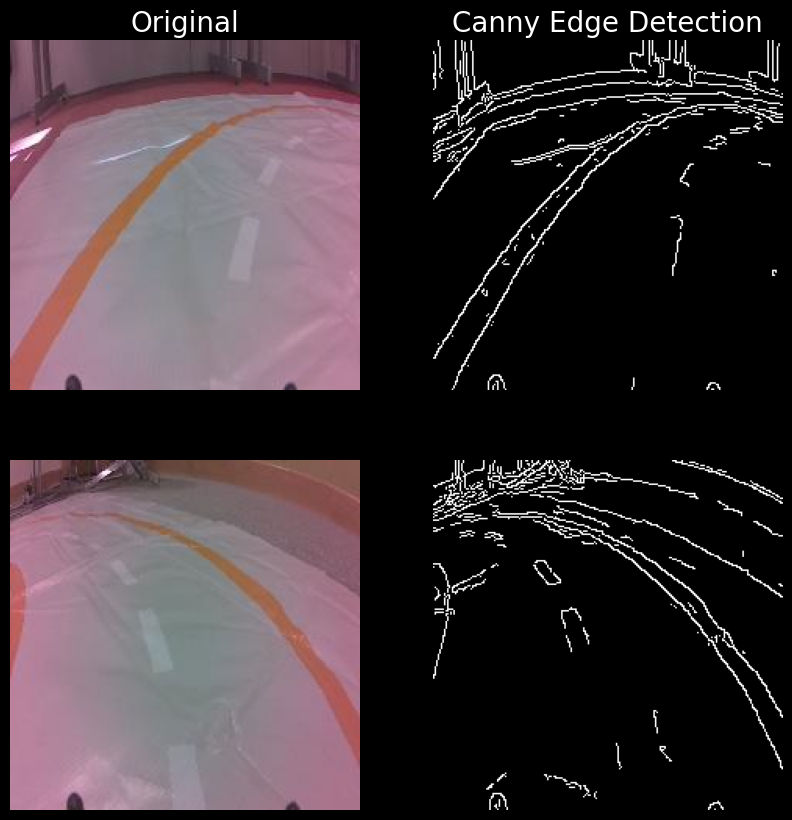

In [17]:
img = Image.open(img_paths[1])
img = np.array(img)

# Apply canny edge detection
edge_img = cv2.Canny(img, threshold1 = 50, threshold2 = 80)

img2 = Image.open(img_paths[510])
img2 = np.array(img2)

# Apply canny edge detection
edge_img2 = cv2.Canny(img2, threshold1 = 50, threshold2 = 80)

# Display images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.patch.set_facecolor('xkcd:black')

ax[0, 0].imshow(img)
ax[0, 0].set_title('Original', size=20)

ax[0, 1].imshow(edge_img, cmap='gray')
ax[0, 1].set_title('Canny Edge Detection', size=20)

ax[1, 0].imshow(img2)
ax[1, 1].imshow(edge_img2, cmap='gray')

for a1 in ax:
    for a2 in a1:
        a2.axis('off')
        a2.axis('tight')
        a2.axis('image')

## Colour filter 

In [18]:
def pixel_filter(img, t=0):
    '''
    Filter pixels within range
    '''
    
    lower = [134 - t, 84 - t, 55 - t]
    upper = [192 + t, 121 + t, 101 + t]

    img = np.array(img)
    orange_thresh = 255 - cv2.inRange(img, np.array(lower), np.array(upper))

    return orange_thresh

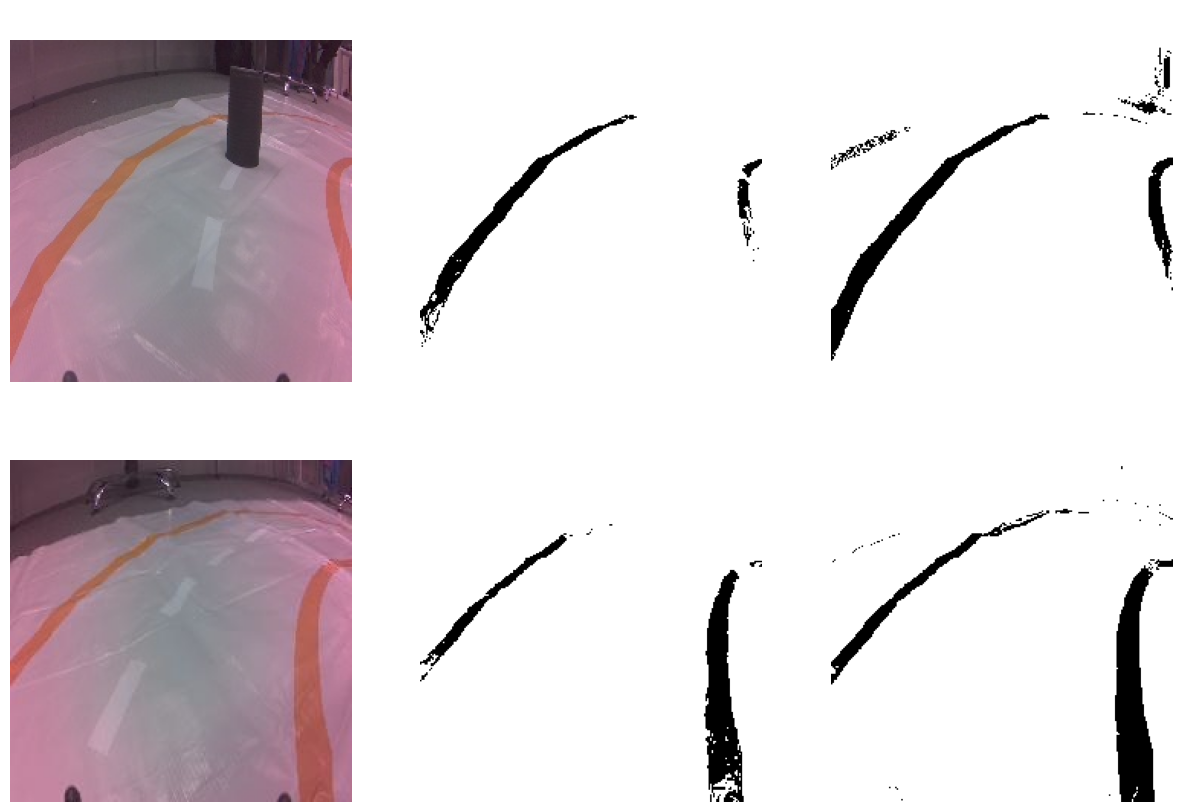

In [26]:
img = Image.open(img_paths[2])
img2 = Image.open(img_paths[7])

# Display images
fig,ax = plt.subplots(2, 3, figsize=(15,10))
fig.patch.set_facecolor('xkcd:white')

ax[0, 0].imshow(img) 
ax[0, 0].set_title("Original", size=20)

ax[0, 1].imshow(pixel_filter(img), cmap='gray') 
ax[0, 1].set_title("t=0", size=20)

ax[0, 2].imshow(pixel_filter(img,10), cmap='gray') 
ax[0, 2].set_title("t=10", size=20)

ax[1, 0].imshow(img2)
ax[1, 1].imshow(pixel_filter(img2), cmap='gray')
ax[1, 2].imshow(pixel_filter(img2, 10), cmap='gray')

for a1 in ax:
    for a2 in a1:
        a2.axis('off')
        a2.axis('tight')
        a2.axis('image')

In [20]:
#Colours obtained with colour picker
colours = [[134,  94,  58],
 [167,  97,  99],
 [134,  87,  81],
 [134,  95,  64],
 [181,  98,  94],
 [175, 100,  95],
 [164,  97,  81],
 [176,  95,  94],
 [147,  96,  79],
 [168, 100,  97],
 [163, 106,  95],
 [160, 114,  91],
 [142, 106,  92],
 [144,  88,  91],
 [142,  96,  81],
 [145,  98,  78],
 [176,  95,  76],
 [153,  94,  60],
 [155, 109,  76],
 [169, 121,  99],
 [182, 102,  91],
 [182, 106,  93],
 [173,  88,  83],
 [165,  92,  83],
 [141,  96,  55],
 [147, 102,  63],
 [181,  92,  84],
 [164,  84,  85],
 [183, 102, 101],
 [166, 107,  73],
 [158, 105,  65],
 [155, 109,  73],
 [156,  98,  78],
 [175,  87,  85],
 [177,  93,  91],
 [161,  90,  88],
 [174,  90,  79],
 [177, 108, 101],
 [146, 108,  85],
 [154, 105,  73],
 [153, 104,  89],
 [147,  96,  95],
 [166, 105,  77],
 [157, 115,  91],
 [152,  96,  71],
 [156, 106,  71],
 [166, 100,  76],
 [187,  93,  94],
 [177,  94,  90],
 [157, 108,  76],
 [153, 106,  64],
 [165, 112,  80],
 [187,  99,  97],
 [181,  98,  82],
 [151, 106,  67],
 [143, 104,  73],
 [170, 104,  78],
 [157, 104,  62],
 [172, 105,  79],
 [192, 115,  85]]

In [21]:
min_colour = [min(x[0] for x in colours),
              min(x[1] for x in colours),
              min(x[2] for x in colours)]

max_colour = [max(x[0] for x in colours),
              max(x[1] for x in colours),
              max(x[2] for x in colours)]

print(min_colour)
print(max_colour)

[134, 84, 55]
[192, 121, 101]


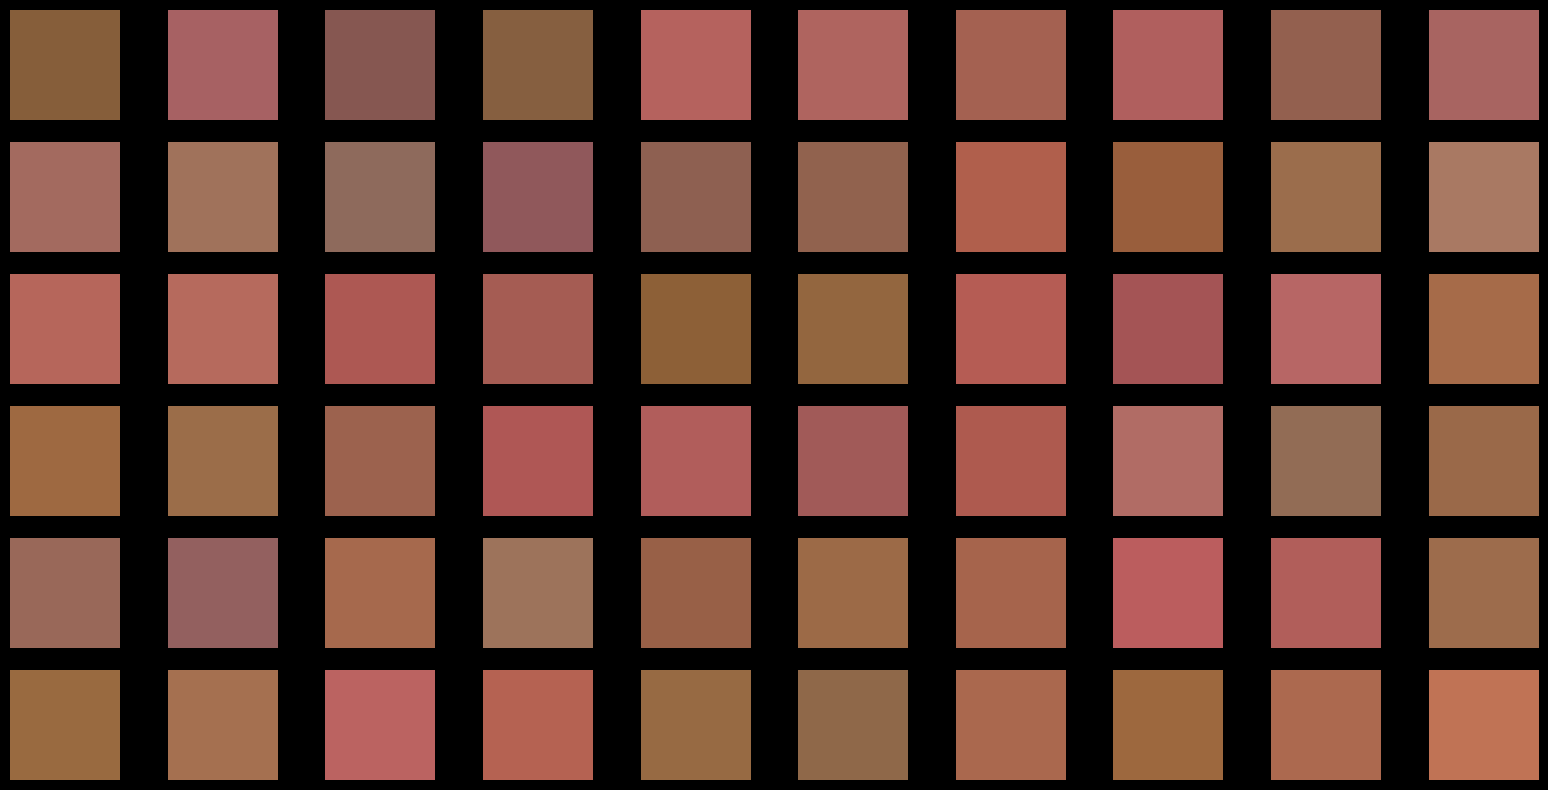

In [22]:
colours_shaped = np.reshape(colours, (6, 10, 3))

# Example images
fig, ax = plt.subplots(6, 10, figsize=(20, 10))

for i in range(6):
    for j in range(10):
        
        img = [[colours_shaped[i][j]] * 100] * 100
        
        ax[i,j].imshow(img)
        ax[i,j].axis('off')
        ax[i,j].axis("tight")
        ax[i,j].axis("image")